In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [8]:
x = np.linspace(-3,5,20)
y = 2 * x + 3
y_noise = np.random.normal(0,2,20)
y += y_noise

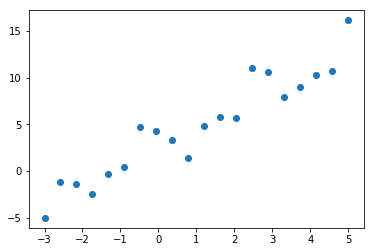

In [9]:
plt.scatter(x,y)
plt.show()

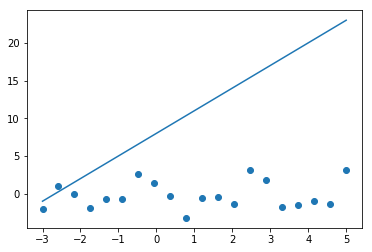

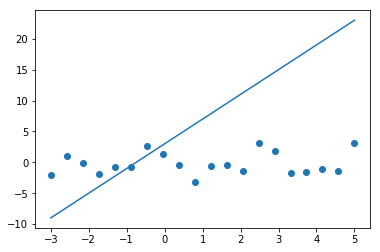

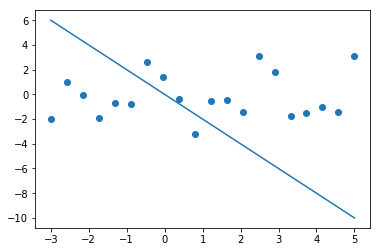

In [10]:
for y_guess in [3*x + 8,4 * x + 3, -2 * x]:
    plt.scatter(x,y_noise)
    plt.plot(x,y_guess)
    plt.show()

In [11]:
def calculate_loss_function(x_input,y_input,a,b):
    assert len(x_input) == len(y_input)
    y_predicted = a*x + b
    d = np.power(y - y_predicted,2)
    return np.sum(d)/len(x)

In [14]:
calculate_loss_function(x,y,3,8)

46.461146553410735

In [16]:
calculate_loss_function(x,y,2,3)

3.1322462705604286

In [21]:
def compute_gradients(x, y, a, b):
    
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    
    return (a_gradient, b_gradient)

In [23]:
np.array(compute_gradients(x,y,-2,0)) * 0.001

array([-0.06179952, -0.01358484])

In [25]:
a,b = -10,20

In [24]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))

    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    
    return (new_a, new_b)

In [33]:
alpha = 0.01 # Learning rate
for step in range(3041):

    a, b = perform_gradient_descent(x, y, a, b, alpha)

    if step % 100 == 0:

        error = calculate_loss_function(x, y, a, b)

        print("Step {}: a = {}, b = {}, J = {}".format(step, a, b, error))

    print("Final line: {} * x + {}".format(a, b))

Step 0: a = 2.089637698852187, b = 2.702783573441486, J = 3.0417936207738325
Final line: 2.089637698852187 * x + 2.702783573441486
Final line: 2.089637698852187 * x + 2.7027835734414856
Final line: 2.089637698852187 * x + 2.702783573441485
Final line: 2.089637698852187 * x + 2.7027835734414847
Final line: 2.089637698852187 * x + 2.7027835734414842
Final line: 2.089637698852187 * x + 2.702783573441484
Final line: 2.089637698852187 * x + 2.7027835734414833
Final line: 2.0896376988521874 * x + 2.702783573441483
Final line: 2.0896376988521874 * x + 2.7027835734414825
Final line: 2.0896376988521874 * x + 2.702783573441482
Final line: 2.0896376988521874 * x + 2.7027835734414816
Final line: 2.0896376988521874 * x + 2.702783573441481
Final line: 2.0896376988521874 * x + 2.7027835734414807
Final line: 2.0896376988521874 * x + 2.7027835734414802
Final line: 2.089637698852188 * x + 2.70278357344148
Final line: 2.089637698852188 * x + 2.7027835734414793
Final line: 2.089637698852188 * x + 2.702783

Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line: 2.089637698852188 * x + 2.7027835734414776
Final line

2.089637698852188 2.7027835734414776


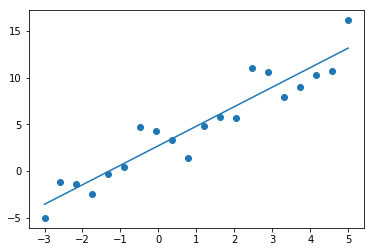

In [34]:
print(a,b)
y_guessed = a * x + b
plt.scatter(x,y)
plt.plot(x,y_guessed)
plt.show()

In [6]:
boston_data = load_boston()
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      